In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=ffb87b235c287ac405e91772e3eb5fb163db2dc392d04a3b6f28c5e68e9008d5
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
pip install gdown

In [3]:
import gdown

In [4]:
data_path = 'https://drive.google.com/uc?id='
data_file_id = '1i9s4gLqKw19gknr3BVW5L_5PbaOg-_Bj'
output_name = 'data.zip'

In [5]:
gdown.download(data_path+data_file_id, output_name, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1i9s4gLqKw19gknr3BVW5L_5PbaOg-_Bj
To: /content/data.zip
100%|██████████| 134k/134k [00:00<00:00, 53.3MB/s]


'data.zip'

In [6]:
import zipfile
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')


In [7]:
import os
if not os.path.exists('result'):
  os.makedirs('result')

In [8]:
import numpy as np
import pandas as pd

In [96]:
pd_wine_data = pd.read_csv('data/train.csv')

In [97]:
pd_wine_data.head(10)

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7
5,6,6.0,0.33,0.38,9.7,0.040,29.0,124.0,0.99540,3.47,0.48,11.0,white,6
6,7,6.1,0.30,0.56,2.7,0.046,46.0,184.0,0.99240,3.31,0.57,10.9,white,6
7,8,6.9,0.41,0.33,2.2,0.081,22.0,36.0,0.99490,3.41,0.75,11.1,red,6
8,9,7.4,0.44,0.20,11.5,0.049,44.0,157.0,0.99800,3.27,0.44,9.0,white,5
9,10,6.8,0.59,0.06,6.0,0.060,11.0,18.0,0.99620,3.41,0.59,10.8,red,7


In [98]:
pd_wine_data.shape

(3231, 14)

In [99]:
pd_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3231 non-null   int64  
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   float64
 12  type                  3231 non-null   object 
 13  quality               3231 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.5+ KB


In [100]:
pd_wine_data.describe()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000
mean,1616.000000,7.205772,0.336072,0.319496,5.454813,0.055890,30.583720,116.256577,0.994667,3.214166,0.531455,10.497108,5.829155
std,932.853686,1.295494,0.160285,0.145854,4.816098,0.035722,17.387143,55.759070,0.003054,0.161873,0.149686,1.193813,0.850003
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.400000,4.000000
25%,808.500000,6.400000,0.227500,0.250000,1.800000,0.038000,17.000000,78.000000,0.992205,3.100000,0.430000,9.500000,5.000000
50%,1616.000000,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,119.000000,0.994840,3.200000,0.510000,10.300000,6.000000
75%,2423.500000,7.700000,0.400000,0.390000,8.100000,0.064000,42.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000
max,3231.000000,15.900000,1.040000,1.660000,65.800000,0.611000,131.000000,344.000000,1.038980,4.010000,1.980000,14.900000,8.000000


In [125]:
pd_wine_data['type'].unique()

array(['white', 'red'], dtype=object)

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

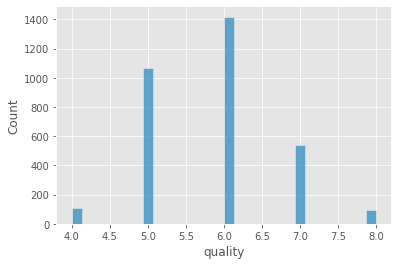

In [102]:
sns.histplot(pd_wine_data['quality'])

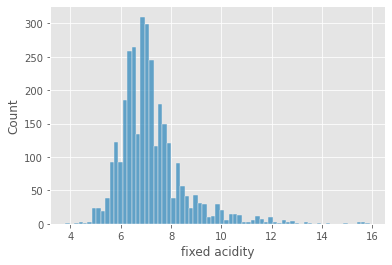

In [103]:
sns.histplot(pd_wine_data['fixed acidity'])

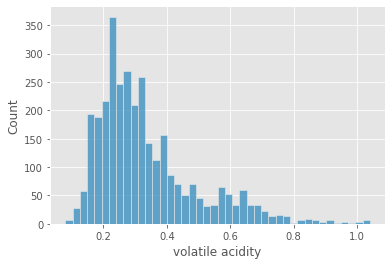

In [104]:
sns.histplot(pd_wine_data['volatile acidity'])

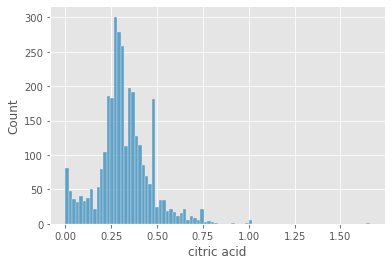

In [105]:
sns.histplot(pd_wine_data['citric acid'])

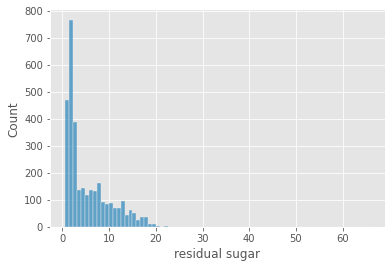

In [106]:
sns.histplot(pd_wine_data['residual sugar'])

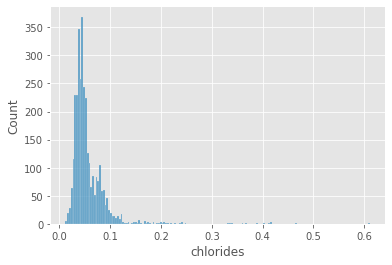

In [107]:
sns.histplot(pd_wine_data['chlorides'])

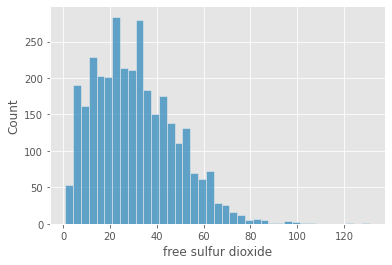

In [108]:
sns.histplot(pd_wine_data['free sulfur dioxide'])

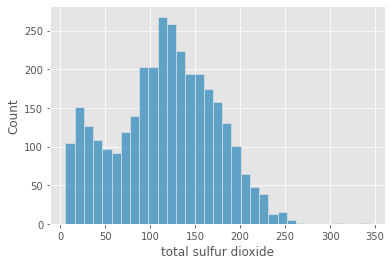

In [109]:
sns.histplot(pd_wine_data['total sulfur dioxide'])

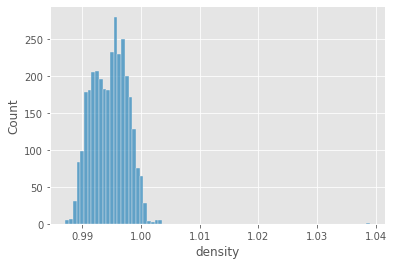

In [110]:
sns.histplot(pd_wine_data['density'])

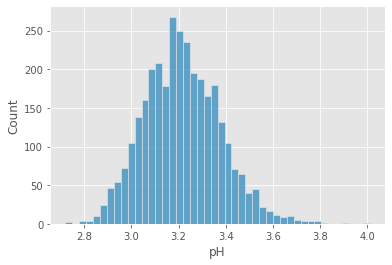

In [111]:
sns.histplot(pd_wine_data['pH'])

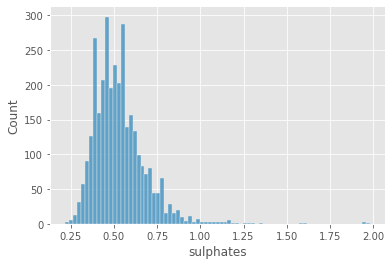

In [112]:
sns.histplot(pd_wine_data['sulphates'])

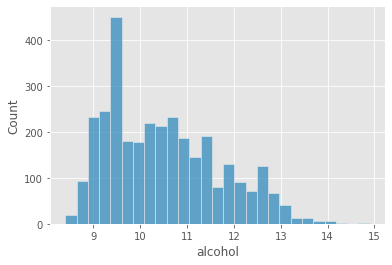

In [113]:
sns.histplot(pd_wine_data['alcohol'])

In [114]:
total_corr = pd_wine_data.corr()

In [115]:
total_corr

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
id,1.000000,0.018970,0.006596,0.011222,-0.037193,-0.018822,-0.000888,-0.012760,-0.021715,-0.010712,-0.031720,-0.000821,-0.011903
fixed acidity,0.018970,1.000000,0.232630,0.322810,-0.103202,0.293142,-0.280763,-0.321019,0.455402,-0.262493,0.287222,-0.095422,-0.081833
volatile acidity,0.006596,0.232630,1.000000,-0.345733,-0.188803,0.364315,-0.361046,-0.412550,0.279816,0.241005,0.250557,-0.044734,-0.255084
citric acid,0.011222,0.322810,-0.345733,1.000000,0.143676,0.065396,0.136252,0.179739,0.112365,-0.303586,0.055739,-0.013053,0.066630
residual sugar,-0.037193,-0.103202,-0.188803,0.143676,1.000000,-0.124167,0.400449,0.486119,0.567618,-0.260946,-0.175722,-0.352132,-0.045225
chlorides,-0.018822,0.293142,0.364315,0.065396,-0.124167,1.000000,-0.190749,-0.276137,0.352764,0.034020,0.398705,-0.262646,-0.185623
free sulfur dioxide,-0.000888,-0.280763,-0.361046,0.136252,0.400449,-0.190749,1.000000,0.721963,0.024838,-0.138593,-0.193609,-0.180137,0.068432
total sulfur dioxide,-0.012760,-0.321019,-0.412550,0.179739,0.486119,-0.276137,0.721963,1.000000,0.045679,-0.218352,-0.266420,-0.268022,-0.043504
density,-0.021715,0.455402,0.279816,0.112365,0.567618,0.352764,0.024838,0.045679,1.000000,0.001155,0.253116,-0.677935,-0.309164
pH,-0.010712,-0.262493,0.241005,-0.303586,-0.260946,0.034020,-0.138593,-0.218352,0.001155,1.000000,0.189430,0.121912,0.036293


In [116]:
total_corr['quality'][1:]

fixed acidity          -0.081833
volatile acidity       -0.255084
citric acid             0.066630
residual sugar         -0.045225
chlorides              -0.185623
free sulfur dioxide     0.068432
total sulfur dioxide   -0.043504
density                -0.309164
pH                      0.036293
sulphates               0.026895
alcohol                 0.451999
quality                 1.000000
Name: quality, dtype: float64

In [117]:
pd_wine_data[pd_wine_data.columns[1:]].corr()['quality'][:-1]

fixed acidity          -0.081833
volatile acidity       -0.255084
citric acid             0.066630
residual sugar         -0.045225
chlorides              -0.185623
free sulfur dioxide     0.068432
total sulfur dioxide   -0.043504
density                -0.309164
pH                      0.036293
sulphates               0.026895
alcohol                 0.451999
Name: quality, dtype: float64

In [118]:
from itertools import permutations, combinations

In [124]:
columns_name = pd_wine_data.columns
print(columns_name)
columns_name = columns_name[1:]
print(columns_name)

Index(['id', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type',
       'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'quality'],
      dtype='object')


In [137]:
# total_comb_list = list(combinations(columns_name, 2))
list(combinations(columns_name, 2))

[('fixed acidity', 'volatile acidity'),
 ('fixed acidity', 'citric acid'),
 ('fixed acidity', 'residual sugar'),
 ('fixed acidity', 'chlorides'),
 ('fixed acidity', 'free sulfur dioxide'),
 ('fixed acidity', 'total sulfur dioxide'),
 ('fixed acidity', 'density'),
 ('fixed acidity', 'pH'),
 ('fixed acidity', 'sulphates'),
 ('fixed acidity', 'alcohol'),
 ('fixed acidity', 'type'),
 ('fixed acidity', 'quality'),
 ('volatile acidity', 'citric acid'),
 ('volatile acidity', 'residual sugar'),
 ('volatile acidity', 'chlorides'),
 ('volatile acidity', 'free sulfur dioxide'),
 ('volatile acidity', 'total sulfur dioxide'),
 ('volatile acidity', 'density'),
 ('volatile acidity', 'pH'),
 ('volatile acidity', 'sulphates'),
 ('volatile acidity', 'alcohol'),
 ('volatile acidity', 'type'),
 ('volatile acidity', 'quality'),
 ('citric acid', 'residual sugar'),
 ('citric acid', 'chlorides'),
 ('citric acid', 'free sulfur dioxide'),
 ('citric acid', 'total sulfur dioxide'),
 ('citric acid', 'density'),
 (

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1163: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


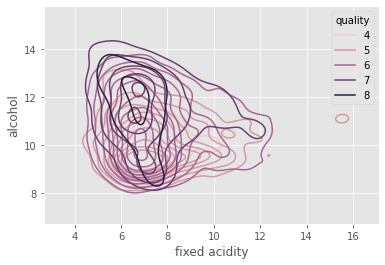

In [149]:
sns.kdeplot(data=pd_wine_data, x='fixed acidity', y='alcohol', hue='quality', cmap='Reds')
#sns.scatterplot(data=pd_wine_data, x='fixed acidity', y='alcohol', hue='quality', color='red')
#sns.histplot(data=pd_wine_data, x='fixed acidity', y='alcohol', bins=50, hue='quality', color='red')

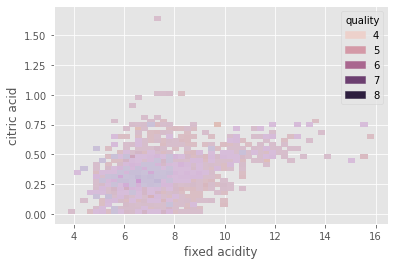

In [139]:
sns.histplot(data=pd_wine_data, x='fixed acidity', y='citric acid', bins=50, hue='quality')

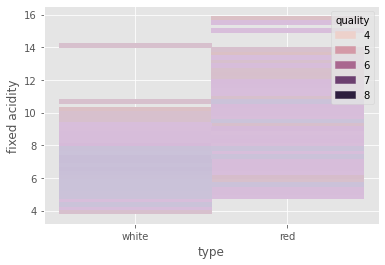

In [127]:
sns.histplot(data=pd_wine_data, x='type', y='fixed acidity', bins=50, hue='quality')

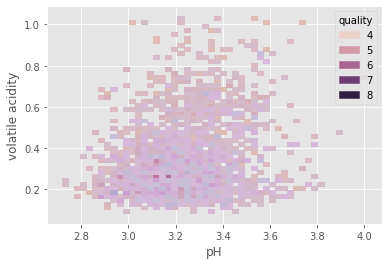

In [123]:
sns.histplot(data=pd_wine_data, x='pH', y='volatile acidity', bins=50, hue='quality')